Loading dataset...
Dataset loaded: 3890 rows, 21 columns
Processing 13 features...
Computing correlations...

--- Correlation with Is High Performing ---
Is High Performing     1.000000
Has Image              0.200312
Post Content Length    0.180587
Linebreak Count        0.136824
Emoji Count            0.115051
Hashtag Count          0.092874
Semantic Alignment     0.048467
Hook Length            0.012184
Has Video              0.005271
Network Size           0.003584
Day Of Week            0.000143
Hour                  -0.002236
Sentiment Score       -0.006617
Name: Is High Performing, dtype: float64


/var/folders/qq/dd1jylxj5jg796rdmqfx3ybr0000gn/T/ipykernel_57231/1508104888.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({True: 1, False: 0, "TRUE": 1, "FALSE": 0, "Yes": 1, "No": 0})
/var/folders/qq/dd1jylxj5jg796rdmqfx3ybr0000gn/T/ipykernel_57231/1508104888.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({True: 1, False: 0, "TRUE": 1, "FALSE": 0, "Yes": 1, "No": 0})


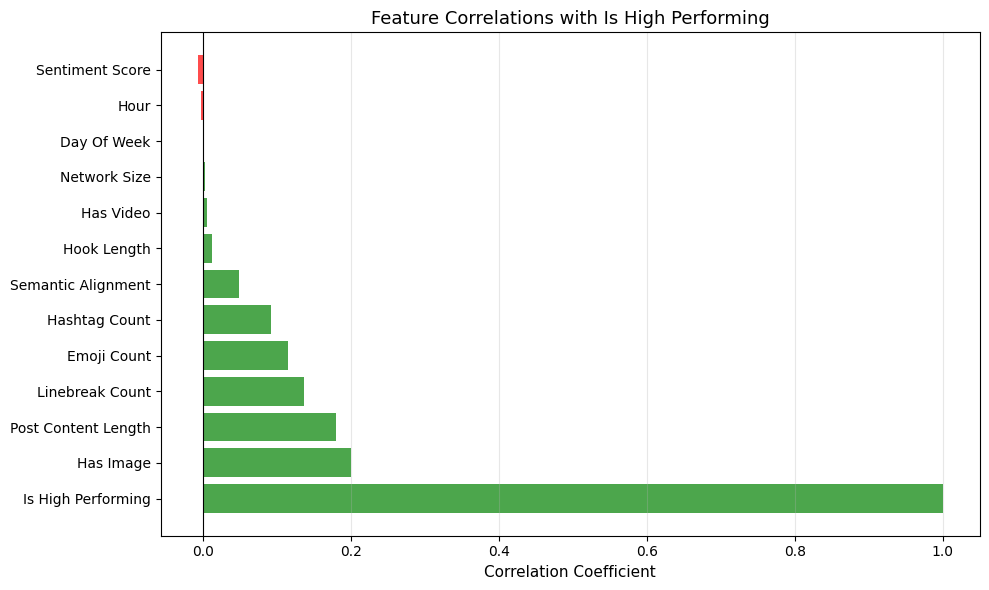


--- Correlation with Is High Performing ---
Is High Performing     1.000000
Has Image              0.200312
Post Content Length    0.180587
Linebreak Count        0.136824
Emoji Count            0.115051
Hashtag Count          0.092874
Semantic Alignment     0.048467
Hook Length            0.012184
Has Video              0.005271
Network Size           0.003584
Day Of Week            0.000143
Hour                  -0.002236
Sentiment Score       -0.006617
Name: Is High Performing, dtype: float64

Generating full correlation heatmap (no annotations for speed)...


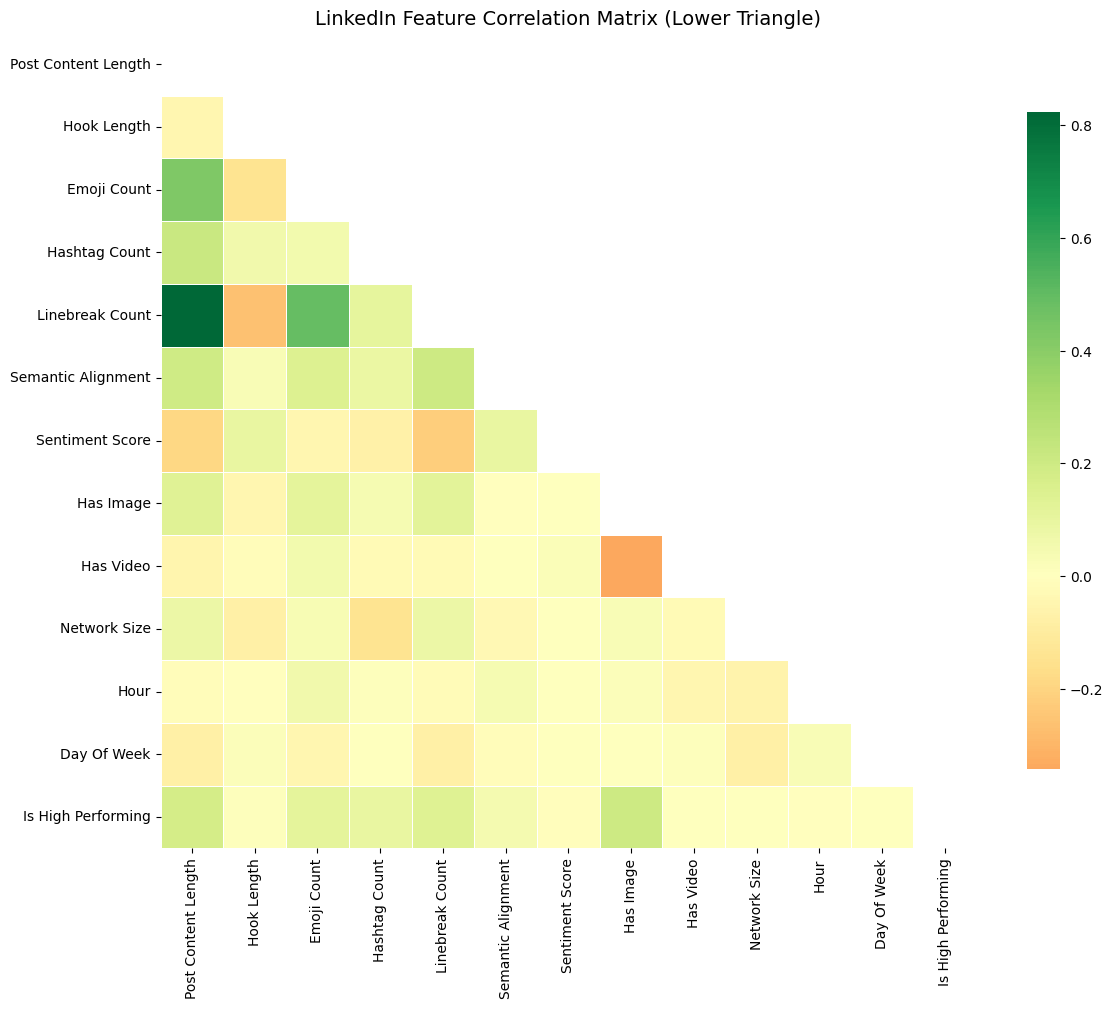


Correlation analysis complete!


In [2]:
# %% BLOCK: Correlation Matrix Analysis (Optimized)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Loading dataset...")
df_corr = pd.read_csv("../data/Master_Dataset_LinkedIn.csv")
print(f"Dataset loaded: {df_corr.shape[0]} rows, {df_corr.shape[1]} columns")

numeric_features = [
    "Post Content Length", "Hook Length", "Emoji Count",
    "Hashtag Count", "Linebreak Count",
    "Semantic Alignment", "Sentiment Score",
    "Has Image", "Has Video", 
    "Network Size", "Hour", "Day Of Week",
    "Is High Performing"
]

# keep only columns that exist
available = [c for c in numeric_features if c in df_corr.columns]
missing = sorted(set(numeric_features) - set(available))
if missing:
    print("Missing columns (skipped):", missing)

print(f"Processing {len(available)} features...")

# robust boolean -> 0/1 conversion
bool_cols = [c for c in ["Has Image", "Has Video", "Is High Performing"] if c in df_corr.columns]
for c in bool_cols:
    df_corr[c] = (
        df_corr[c]
        .replace({True: 1, False: 0, "TRUE": 1, "FALSE": 0, "Yes": 1, "No": 0})
        .astype("float")
    )

# ensure everything is numeric (coerce junk to NaN)
corr_df = df_corr[available].apply(pd.to_numeric, errors="coerce")

print("Computing correlations...")
matrix = corr_df.corr(method="pearson")

# OPTIMIZED: Show target variable correlations as bar chart (faster)
print("\n--- Correlation with Is High Performing ---")
if "Is High Performing" in matrix.columns:
    target_corr = matrix["Is High Performing"].sort_values(ascending=False)
    print(target_corr)
    
    # Visualize target correlations as bar chart (much faster than full heatmap)
    plt.figure(figsize=(10, 6))
    colors = ['green' if x > 0 else 'red' for x in target_corr.values]
    plt.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
    plt.yticks(range(len(target_corr)), target_corr.index)
    plt.xlabel('Correlation Coefficient', fontsize=11)
    plt.title('Feature Correlations with Is High Performing', fontsize=13)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n--- Correlation with Is High Performing ---")
if "Is High Performing" in matrix.columns:
    engagement_corr = matrix["Is High Performing"].sort_values(ascending=False)
    print(engagement_corr)

# OPTIONAL: Full heatmap without annotations (faster rendering)
print("\nGenerating full correlation heatmap (no annotations for speed)...")
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(
    matrix, mask=mask,
    cmap="RdYlGn", center=0, square=True, linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("LinkedIn Feature Correlation Matrix (Lower Triangle)", fontsize=14)
plt.tight_layout()
plt.show()

print("\nCorrelation analysis complete!")